# Step 1: Loading the Dataset:

## 1. Library Imports

In this code block, we import three essential Python libraries for data analysis and visualization:

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Titanic Dataset and Data Inspection

In [36]:
# Convert 'Harvest_year' to a datetime format
titanic_df = pd.read_csv('titanic3.csv')
# Inspect the data types of the columns in the df_cropstats DataFrame
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


The output shows statistics for the columns:

- 'pclass' (passenger class)
- 'survived' (survival status), 
- 'age' (age of passengers), 
- 'sibsp' (number of siblings/spouses on board), 
- 'parch' (number of parents/children on board), 
- 'fare' (ticket fare), and 'body' (body number). 


### Data Types of Dataset Columns


In [37]:
titanic_df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

The output provides the following information about the data types of each column:

- `pclass`: This column contains integer values (int64) and likely represents the passenger class.
- `survived`: Also an integer column (int64), likely representing survival status.
- `name`: This column has object data type, which typically represents text or strings.
- `sex`: Another object data type column, likely representing the gender of passengers.
- `age`: This column contains floating-point values (float64) and represents the age of passengers.
- `sibsp`: An integer column (int64) that probably represents the number of siblings/spouses on board.
- `parch`: Another integer column (int64) likely representing the number of parents/children on board.
- `ticket`: This column has an object data type, indicating ticket information.
- `fare`: A floating-point column (float64) representing the ticket fare.
- `cabin`: An object data type column that likely represents cabin information.
- `embarked`: Another object data type column that likely represents the port of embarkation.
- `boat`: This column is of object data type and probably contains information about the lifeboat.
- `body`: A floating-point column (float64) that may represent a unique identifier or body number.
- `home.dest`: This column is of object data type and likely contains information about passengers' home destinations.



## 3. Column Renaming


The purpose of this operation is to make column names consistent, more readable, and suitable for Python variable naming conventions. It can simplify subsequent data analysis and manipulation, as column names without spaces and in lowercase are easier to work with.

In [38]:
# Rename columns: replace spaces with underscores and convert to lowercase
titanic_df.columns = titanic_df.columns.str.replace('.', '_').str.lower()

# Display the column names
titanic_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home_dest'],
      dtype='object')

# Step 2: Identifying and Handling the Missing Values

## 1. Identifying all missing values

We identify and count missing values in each column of the DataFrame.

In [39]:
# Identify missing values in each column
missing_values = titanic_df.isnull().sum()

# Display columns with missing values and their counts
missing_values[missing_values>0]

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64


The output lists columns with missing values:

- age: 263 missing values
- fare: 1 missing value
- cabin: 1014 missing values
- embarked: 2 missing values
- boat: 823 missing values
- body: 1188 missing values
- home_dest: 564 missing values

## 2. Handling the Missing Values

### 1. Imputing Missing Values in the 'age' Column

We address missing values in the 'age' column of the DataFrame.

1.  We fill missing values in the 'age' column with the median age of the dataset. This operation is done to provide a reasonable estimate for missing ages.

2. After imputation, we round the 'age' column values to the nearest integer and convert the column to the integer data type. This can make the data more interpretable and suitable for certain types of analysis.

3. We check the number of missing values in the 'age' column after imputation.

In [40]:
# Impute missing values in the age column with the median age

titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
# Round the 'age' column and convert to integer type
titanic_df['age'] = titanic_df['age'].round().astype(int)
# Display the number of missing values in the age column after imputation
missing_age_after_median_imputation = titanic_df['age'].isnull().sum()
missing_age_after_median_imputation

0

### 2. Identifying and Imputing Missing Fare Value

We address the missing fare value in the DataFrame.

1. We first identify the row with a missing fare value by using a boolean condition. the we use it to filter the DataFrame. This provides information about the passenger with a missing fare value.

In [41]:
# Identify the row with the missing fare value
missing_fare_row = titanic_df[titanic_df['fare'].isnull()]

missing_fare_row

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
1225,3,0,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S,NaN,261.0,NaN



2. We then attempt to impute the missing fare value based on similar characteristics of other passengers:
   - We define a subset of passengers with similar characteristics. These characteristics include passengers with the same passenger class ('pclass' 3), who embarked at the same port ('S'), and whose age falls within a certain range (between 55 and 65 years). These passengers are considered to be similar to the one with the missing fare value.
3. We calculate the median fare for the selected similar passengers. This median fare will be used to impute the missing fare value for the passenger identified earlier.

4. We also calculate the overall median fare for comparison. This is the median fare for all passengers in the dataset.

In [42]:
# Find rows with similar characteristics to the missing fare row
similar_passengers = titanic_df[(titanic_df['pclass'] == 3) & 
                                (titanic_df['embarked'] == 'S') & 
                                (titanic_df['age'] >= 55) & 
                                (titanic_df['age'] <= 65)]

# Calculate the median fare for these similar passengers
similar_passengers_median_fare = similar_passengers['fare'].median()

# Calculate the overall median fare for comparison
overall_median_fare = titanic_df['fare'].median()

similar_passengers_median_fare, overall_median_fare

(7.65, 14.4542)

The median fare value for passengers with similar characteristics (i.e., in pclass 3, embarked from location 'S', and aged between 55 and 65) is \( \$7.65 \).

For comparison, the overall median fare value for the entire dataset is \( \$14.4542 \).

Based on this analysis, imputing the missing fare value using passengers with similar characteristics would result in a fare value of \( \$7.65 \), as it represents a more specific estimate based on shared characteristics.

In [43]:
# Impute the missing fare value using the median fare of similar passengers
titanic_df.loc[titanic_df['fare'].isnull(), 'fare'] = similar_passengers_median_fare

# Verify that there are no missing values in the fare column
missing_fare_after_similar_passengers_imputation = titanic_df['fare'].isnull().sum()
missing_fare_after_similar_passengers_imputation

0

### 3. Dropping the 'Cabin' Column from the Dataset

This has a high percentage of missing values. 
- One option is to drop the column.
- Another is to fill it with a placeholder like 'Unknown'.

Given that the dataset contains around 1300 rows and the cabin column has 1014 missing values, this implies that approximately 78% of the data for the cabin column is missing. When such a significant portion of data is missing from a column, it's often challenging to derive meaningful insights or impute the values accurately without introducing significant bias.
In such cases, it's a common practice to drop the column entirely, especially if the missing data cannot be reasonably or accurately reconstructed. Therefore, based on this rationale, we'll proceed to drop the cabin column from the dataset.

In [44]:
# Drop the cabin column from the dataset
titanic_df.drop(columns= 'cabin', inplace=True)

# Verify that the cabin column has been removed
cabin_column_exists = 'cabin' in titanic_df.columns
cabin_column_exists

False

### 4. Imputing Missing Values in the 'Embarked' Column with the Mode

We address missing values in the 'embarked' column of the DataFrame.


1. We calculate the mode of the 'embarked' column. The mode represents the most common value in the column.

2. We impute missing values in the 'embarked' column with the most common value (mode) calculated.

3. After imputation, we check the number of missing values in the 'embarked' column.


In [45]:
# Impute missing values in the embarked column with its mode
most_common_embarked = titanic_df['embarked'].mode()[0]
titanic_df['embarked'].fillna(most_common_embarked, inplace=True)

# Display the number of missing values in the embarked column after imputation
missing_embarked_after_mode_imputation = titanic_df['embarked'].isnull().sum()
missing_embarked_after_mode_imputation

0

### 5. Imputing Missing Values in the 'Boat' Column with 'Unknown'

We address missing values in the 'boat' column of the DataFrame.

1. We impute missing values in the 'boat' column. We fill the missing values with the string 'Unknown', which indicates that the boat information is unknown for those passengers.

2. After imputation, we check the number of missing values in the 'boat' column.

In [46]:
# Impute missing values in the boat column with 'Unknown'
titanic_df['boat'].fillna('Unknown', inplace=True)

# Display the number of missing values in the boat column after imputation
missing_boat_after_imputation = titanic_df['boat'].isnull().sum()
missing_boat_after_imputation

0

#### 5.1. Analysis of Unique Boat Values and Survivability Percentage

We analyze the unique boat values in the dataset and calculate the percentage of survivability associated with each unique boat. The dataset contains information about Titanic passengers, including boat numbers and survival status.

1. **Unique Boat Values:**

   - We calculate the unique boat values in the 'boat' column.
   - We count the number of unique boat values.

In [47]:
# Calculate the unique boat values in the dataset
unique_boats = titanic_df['boat'].unique()

number_of_unique_boats = len(unique_boats)
number_of_unique_boats,unique_boats

(28,
 array(['2', '11', 'Unknown', '3', '10', 'D', '4', '9', '6', 'B', '8', 'A',
        '5', '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12',
        '16', '13 15 B', 'C D', '15 16', '13 15'], dtype=object))

- The array shows the unique boat values, which include boat numbers, 'Unknown,' and some values that appear to represent multiple boats (e.g., '5 9,' '13 15 B,' 'C D'). 
- Further investigation might be needed to clarify these values.

2. **Survivability Percentage:**

   - We calculate the percentage of survivability for each unique boat value.
   - We sort the survivability percentages in descending order to identify the boats with the highest survival rates.

In [48]:
# Calculate the percentage of survivability for each unique boat
survivability_percentage = titanic_df.groupby('boat')['survived'].mean() * 100
survivability_percentage = survivability_percentage.sort_values(ascending=False)
survivability_percentage

boat
1          100.000000
3          100.000000
C D        100.000000
9          100.000000
8 10       100.000000
8          100.000000
7          100.000000
6          100.000000
5 9        100.000000
5 7        100.000000
10         100.000000
4          100.000000
5          100.000000
2          100.000000
16         100.000000
15 16      100.000000
15         100.000000
13 15 B    100.000000
13 15      100.000000
13         100.000000
11         100.000000
C           97.368421
14          96.969697
D           95.000000
12          94.736842
B           88.888889
A           63.636364
Unknown      2.794654
Name: survived, dtype: float64

The output shows the boat values and their associated survivability percentages. Some boats have a 100% survival rate, while others have lower rates. The 'Unknown' category represents passengers with missing boat information. 





3. **Correction of "Multi-Boat" Values in the 'Boat' Column.**

We address the "multi-boat" values in the 'boat' column of the DataFrame.

To address the issue of "multi-boat" values, we have two potential strategies. 
 - First approach: involves duplicating the records and assigning the same person to multiple boats, which may introduce bias into our data. 
 - Second approach: we can assign a single boat value from the list provided in the passenger's name. Notably, passengers with unique "multi-boat" names have a 100% survivability rate, making it reasonable to split them into individual records when there is more than one person with such a name.

This correction ensures that each passenger is associated with a single boat value and avoids the bias that would result from duplicating records. The survivability rate for these corrected entries is expected to align with the boat value assigned.

In [49]:
# We specify these "multi boat" names
specified_boats = ['5 9', '5 7' , '13 15', '13 15 B','C D','5 9', '8 10', '15 16']

# Correct the anomalies by assigning a single boat value (taking the first value before the space)
titanic_df['boat'] = titanic_df['boat'].apply(lambda x: x.split()[0] if ' ' in x else x)



4. **One-Hot Encoding of the 'Boat' Column**:

We perform one-hot encoding on the 'boat' column then we drop it from the DataFrame. 


In [50]:
# Perform one-hot encoding on the 'boat' column
encoded_boat_df = pd.get_dummies(titanic_df['boat'], prefix='boat')
encoded_boat_df = encoded_boat_df.astype(int)

# Concatenate the original dataframe with the encoded boat columns
titanic_df = pd.concat([titanic_df, encoded_boat_df], axis=1)

# Drop the original 'boat' column
titanic_df.drop('boat', axis=1, inplace=True)

### 6. Imputing Missing Values in the 'Body' Column.

This indicates the body number for those who died. Missing values might indicate they survived or their body was not found. We can impute with 'Unknown' or a placeholder.

We address missing values in the 'body' column. 

Missing values may suggest that either the passengers survived or their bodies were not found. To handle this, we choose to impute the missing values with a placeholder value of '0'.

Imputing missing values in the 'body' column with '0' and then transforming it into a binary indicator ('1' for not survived, '0' for survived or body not found) allows us to handle the missing data while preserving information about passenger survival.

In [51]:
# Impute missing values in the body column with 0
titanic_df['body'].fillna(0, inplace=True)
titanic_df['body']= titanic_df['body'].apply(lambda x: 0 if x == 0 else 1)
titanic_df['body'] = titanic_df['body'].astype(int)


### 7. Imputing Missing Values in the 'Home_Dest' Column

We address missing values in the 'home_dest' column of the DataFrame.

1. We impute missing values in the 'home_dest' column by filling the missing values with the string 'Unknown', indicating that the passengers' home destinations are unknown.

2. After imputation, we check the number of missing values in the 'home_dest' column.


In [52]:
# Impute missing values in the home_dest column with 'Unknown'
titanic_df['home_dest'].fillna('Unknown', inplace=True)

# Display the number of missing values in the home_dest column after imputation
missing_home_dest_after_imputation = titanic_df['home_dest'].isnull().sum()
missing_home_dest_after_imputation



0

### 8. Identifying Missing Values in Each Column

We identify and count missing values in each column of the DataFrame. After the previous data preprocessing steps, it is expected that there are no missing values in the dataset.

In [53]:
# Identify missing values in each column
missing_values = titanic_df.isnull().sum()

# Display columns with missing values and their counts
missing_values

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
body            0
home_dest       0
boat_1          0
boat_10         0
boat_11         0
boat_12         0
boat_13         0
boat_14         0
boat_15         0
boat_16         0
boat_2          0
boat_3          0
boat_4          0
boat_5          0
boat_6          0
boat_7          0
boat_8          0
boat_9          0
boat_A          0
boat_B          0
boat_C          0
boat_D          0
boat_Unknown    0
dtype: int64

The output, shows the number of missing values for each column. In this case, all columns have 0 missing values, indicating that the dataset is complete and ready for analysis.

# Step 3: Looking for outliars:

## 1. Data distribition

let's use box plots to visually assess potential outliers in the numeric columns: age, sibsp, parch, fare, and body.

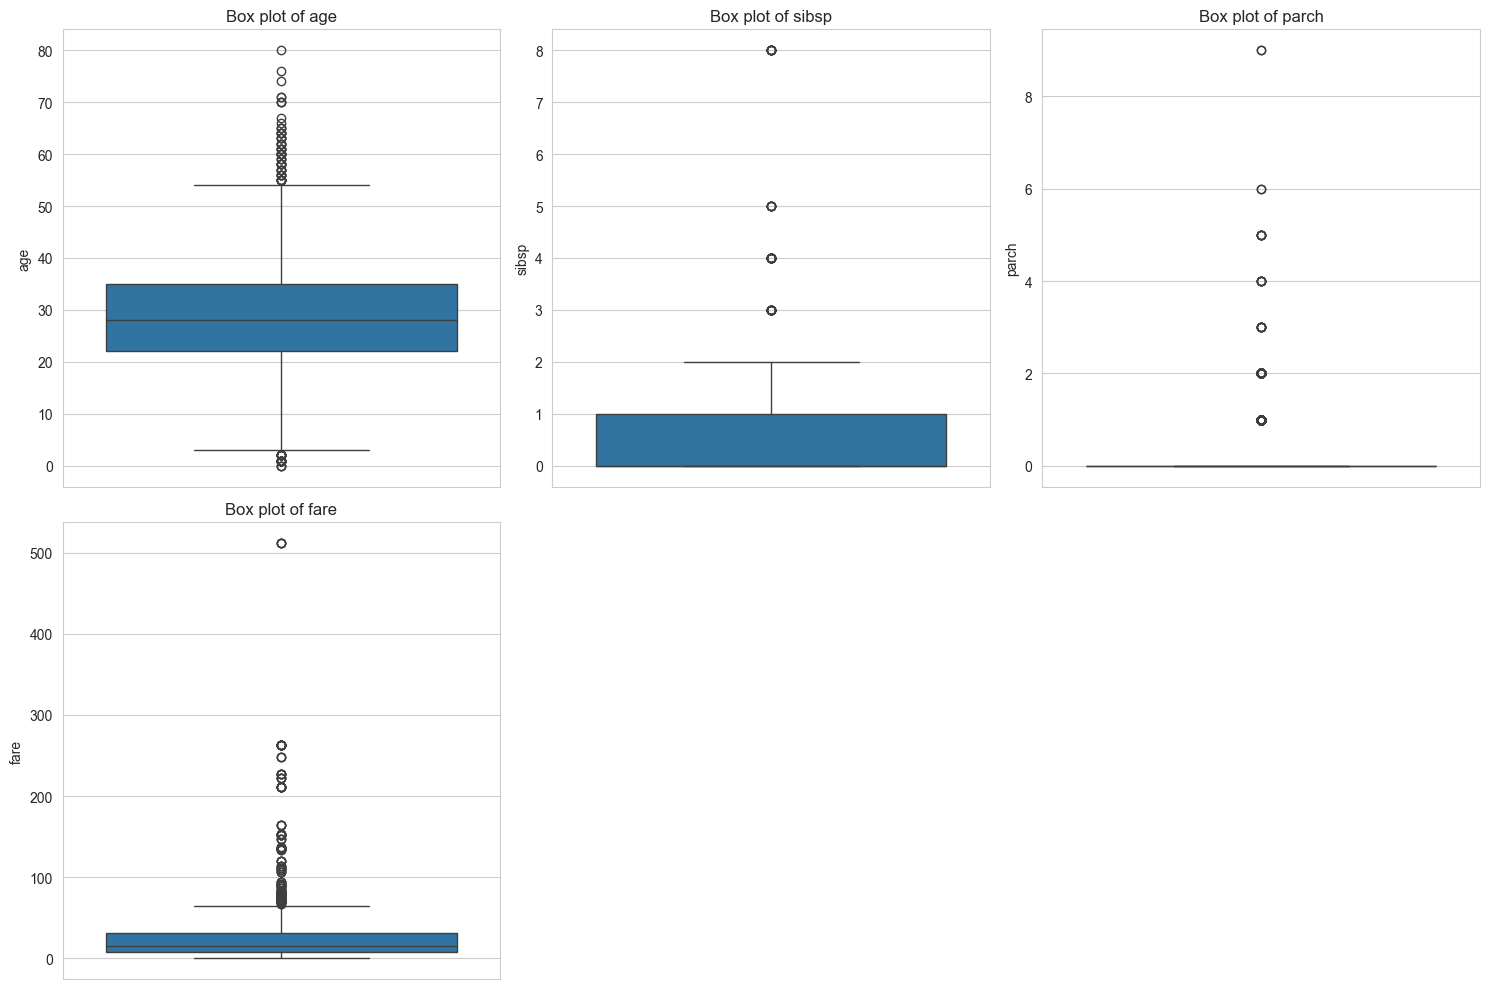

In [54]:
# List of numeric columns to check for outliers
numeric_cols_for_outliers = ['age', 'sibsp', 'parch', 'fare']

# Set up the figure size
plt.figure(figsize=(15, 10))

# Make box plots for each numeric column
for i, col in enumerate(numeric_cols_for_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=titanic_df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

- **Age**: The distribution seems fairly normal. While there are some higher age values, they seem plausible and may not be considered outliers.
- **Sibsp (Siblings/Spouses aboard)**: Most passengers have 0 or 1 siblings/spouses aboard. Values above 4 may be considered rare, but they represent larger families.
- **Parch (Parents/Children aboard)**: The majority of passengers traveled without parents or children. Values above 3 are less common and might be considered outliers. However, they can represent larger families.
- **Fare**: There are a few fares that are significantly higher than the rest, indicating potential outliers, however if multiple family members are traveling together, it's plausible that the fare value for each member represents the total fare for the entire group, rather than the fare for an individual. To adjust for this, we'll divide the fare by the total number of family members traveling together (i.e., sibsp + parch + 1). The "+1" accounts for the passenger themselves.

## 2. Handling Fare Outliars:

### 1. Calculating New Fare Values

The intention is to account for group fares when multiple family members travel together.

New fare values are calculated by dividing the original 'fare' column by the total number of family members traveling together. The equation considers the sum of 'sibsp' (number of siblings/spouses aboard), 'parch' (number of parents/children aboard), and 1 (accounting for the passenger themselves).


In [55]:
# Calculate the new fare values
titanic_df['fare'] = titanic_df['fare'] / (titanic_df['sibsp'] + titanic_df['parch'] + 1)

# Display the first few rows to verify the transformation
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,...,boat_5,boat_6,boat_7,boat_8,boat_9,boat_A,boat_B,boat_C,boat_D,boat_Unknown
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S,...,0,0,0,0,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,1,1,2,113781,37.8875,S,...,0,0,0,0,0,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,37.8875,S,...,0,0,0,0,0,0,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,37.8875,S,...,0,0,0,0,0,0,0,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,37.8875,S,...,0,0,0,0,0,0,0,0,0,1



**Comparison of Original and Adjusted Fare Distributions**

We make a comparison between the distribution of the original fares and the adjusted fares DataFrame. The adjustment is done to account for group fares when multiple family members are traveling together.

1. The original fare values are recalculated by multiplying the adjusted 'fare' column by the total number of family members traveling together (including the passenger themselves).

The visualization allows us to compare the distribution of original and adjusted fares to assess the impact of the adjustment on fare values when multiple family members travel together.

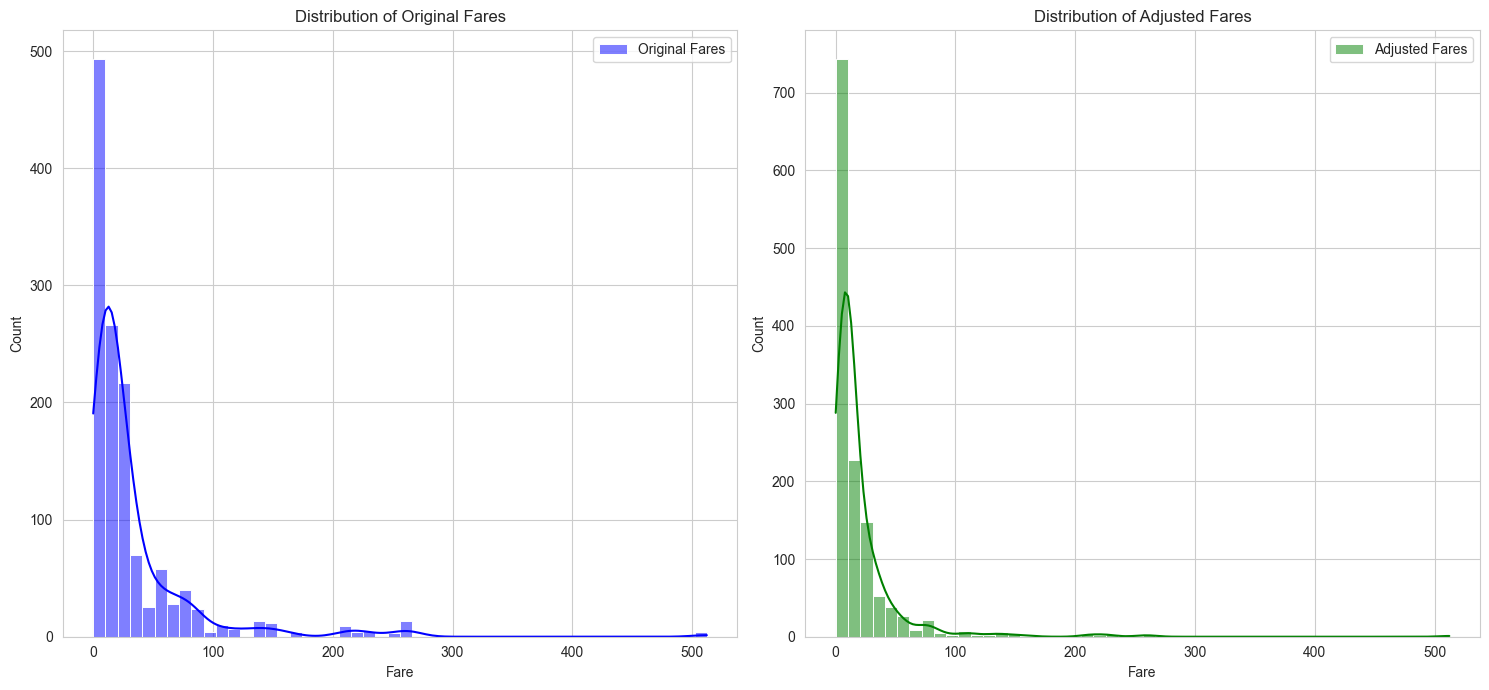

In [56]:
## Recalculate the original fares
original_fares = titanic_df['fare']*(titanic_df['sibsp']+titanic_df['parch']+1)
# Set up the figure size
plt.figure(figsize=(15, 7))

# Plot the distribution of original and adjusted fares side by side
plt.subplot(1, 2, 1)
sns.histplot(original_fares, bins=50, kde=True, color='blue', label='Original Fares')
plt.title('Distribution of Original Fares')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(titanic_df['fare'], bins=50, kde=True, color='green', label='Adjusted Fares')
plt.title('Distribution of Adjusted Fares')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


**Comparison of Fare Distributions Based on Passenger Class**

To better understand the distribution of fare values we compare them based on passenger class (1st, 2nd, and 3rd class) in the DataFrame.
Both original and adjusted fare distributions are visualized to understand how fares vary across different passenger classes.

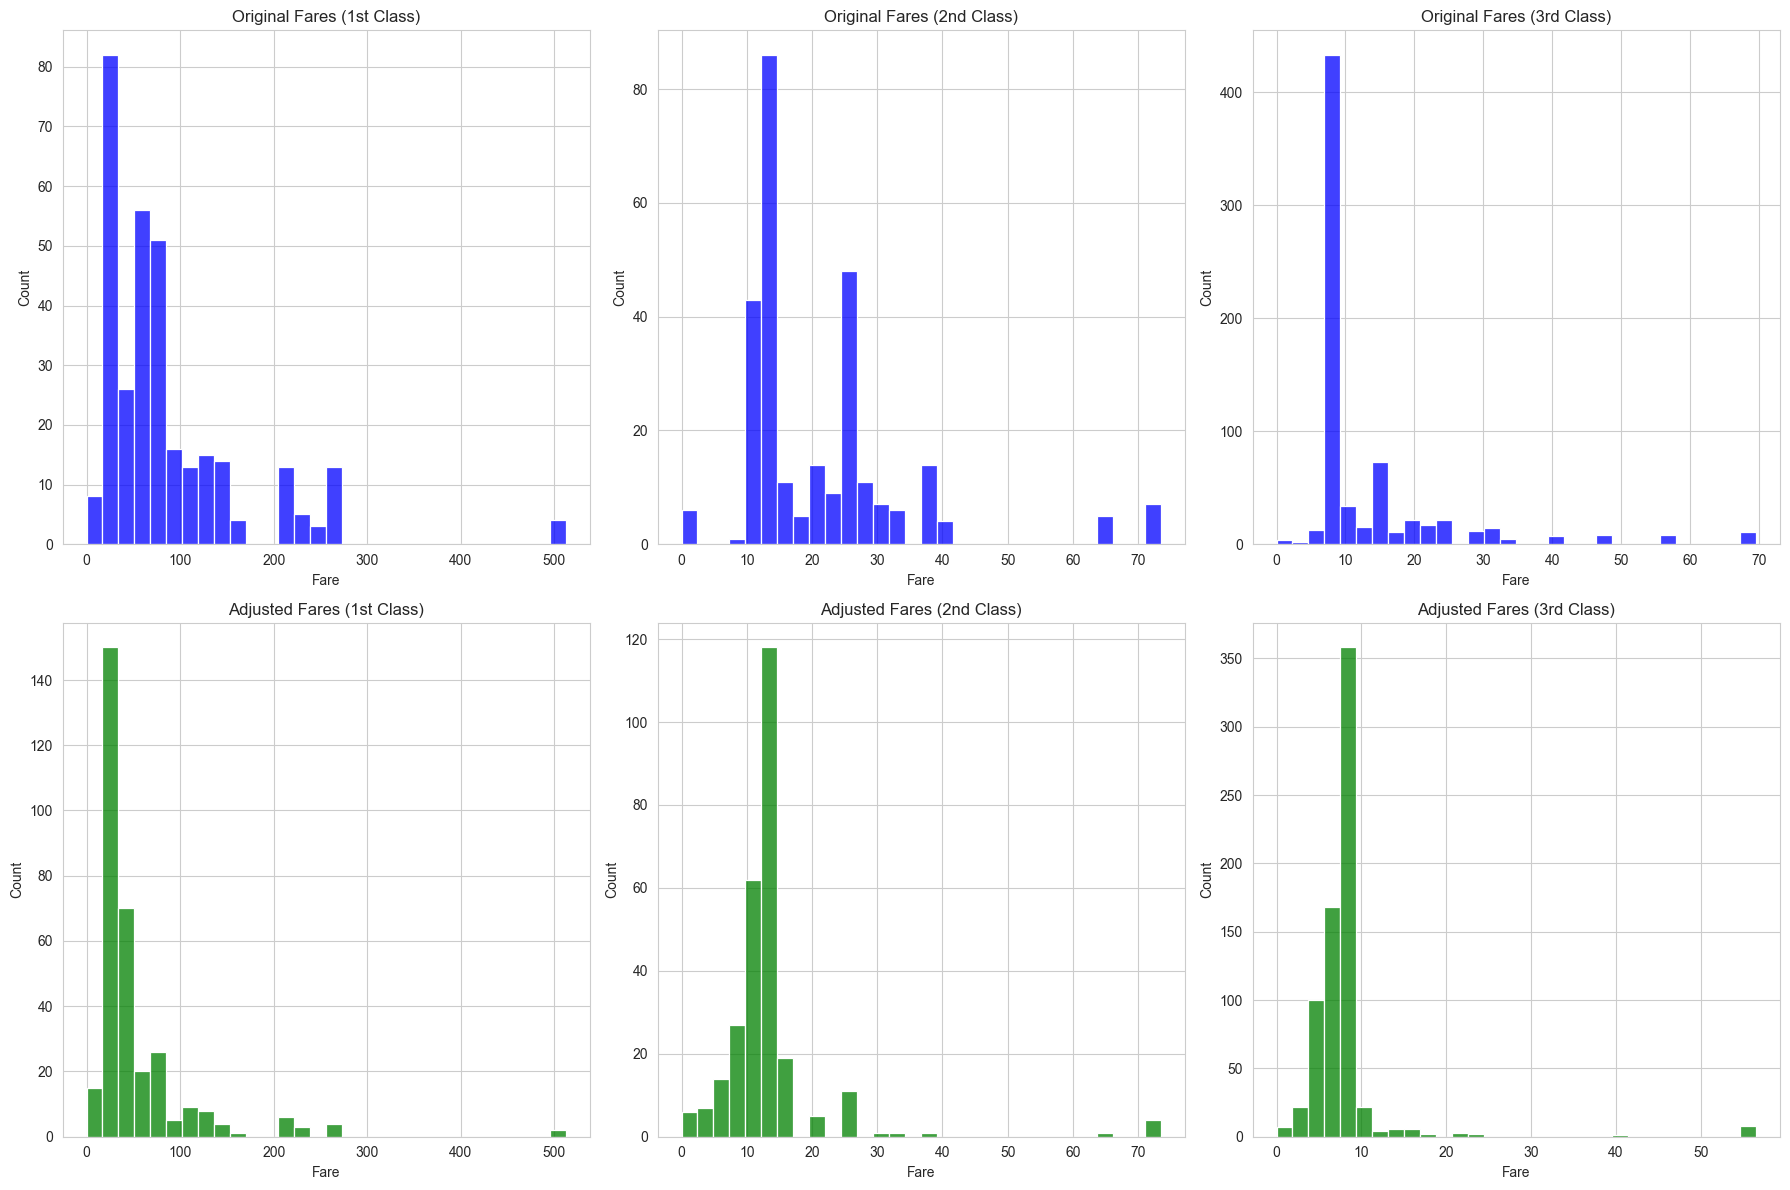

In [57]:
# Set up the figure size
plt.figure(figsize=(18, 12))

# Plot histograms for original fares divided by pclass
plt.subplot(2, 3, 1)
sns.histplot(original_fares[titanic_df['pclass'] == 1], bins=30, kde=False, color='blue')
plt.title('Original Fares (1st Class)')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.histplot(original_fares[titanic_df['pclass'] == 2], bins=30, kde=False, color='blue')
plt.title('Original Fares (2nd Class)')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
sns.histplot(original_fares[titanic_df['pclass'] == 3], bins=30, kde=False, color='blue')
plt.title('Original Fares (3rd Class)')
plt.xlabel('Fare')
plt.ylabel('Count')

# Plot histograms for adjusted fares divided by pclass
plt.subplot(2, 3, 4)
sns.histplot(titanic_df['fare'][titanic_df['pclass'] == 1], bins=30, kde=False, color='green')
plt.title('Adjusted Fares (1st Class)')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.subplot(2, 3, 5)
sns.histplot(titanic_df['fare'][titanic_df['pclass'] == 2], bins=30, kde=False, color='green')
plt.title('Adjusted Fares (2nd Class)')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.subplot(2, 3, 6)
sns.histplot(titanic_df['fare'][titanic_df['pclass'] == 3], bins=30, kde=False, color='green')
plt.title('Adjusted Fares (3rd Class)')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The side-by-side histograms provide a comparison of fare distributions based on passenger class (pclass) for both original and adjusted fares:

Original Fares:

- 1st Class (Top left): The fares are higher, as expected for first-class passengers, with a wider spread of values.
- 2nd Class (Top middle): The fares are in a moderate range and less spread out than the 1st class.
- 3rd Class (Top right): The majority of passengers paid lower fares, indicating the affordability of the third class.

Adjusted Fares:

- 1st Class (Bottom left): After adjustment, the fares are still higher but more concentrated around certain values.
- 2nd Class (Bottom middle): The distribution is similar to the original but with more pronounced peaks.
- 3rd Class (Bottom right): The fares are still lower, but there's a more evident concentration around specific fare values.

The visualizations confirm that the fare adjustment impacted the distribution of fares across all classes, making the fares more concentrated around specific values.

We notice there are fares with a value of 0, it might indicate missing or incorrect data. Replacing these values with the mean fare of the respective pclass is a reasonable approach to impute these missing or incorrect values.

We'll go ahead and replace the 0 fares in the dataset with the mean fare of their respective pclass.

**Handling Zero Fare Values by Replacing with Class-Specific Means:**

In [58]:
# Calculate the mean fares for each pclass
mean_fares_by_pclass = titanic_df.groupby('pclass')['fare'].mean()

# Replace fares with value 0 with the mean fare of the respective pclass
for pclass, mean_fare in mean_fares_by_pclass.items():
    mask = (titanic_df['fare'] == 0) & (titanic_df['pclass'] == pclass)
    titanic_df.loc[mask, 'fare'] = mean_fare

# Verify if there are any fares with value 0 left
fares_with_zero = (titanic_df['fare'] == 0).sum()
fares_with_zero

0

Zero fare values in the DataFrame are addressed by replacing them with the mean fare of their respective passenger class (pclass).

## 3. Labeling

### One-Hot Encoding of the 'Sex' Column

The dataset has a 'sex' column with male and female labels, and it needs transformation into numerical form.

We use the 'sex' column to 'sex_male' and 'sex_female' columns, representing gender with 0s and 1s.

In [59]:


# Apply One-Hot Encoding to the 'sex' column
titanic_df = pd.get_dummies(titanic_df, columns=['sex'], drop_first=False)

# Convert the 'sex_male' and 'sex_female' columns to integers
titanic_df['sex_male'] = titanic_df['sex_male'].astype(int)
titanic_df['sex_female'] = titanic_df['sex_female'].astype(int)


# Convert the 'sex_male' and 'sex_female' columns to integers
titanic_df['sex_male'] = titanic_df['sex_male'].astype(int)
titanic_df['sex_female'] = titanic_df['sex_female'].astype(int)

# Displaying the data types to verify
titanic_df[['pclass','sex_female','sex_female',]]


,pclass,sex_female,sex_female
0,1,1,1
1,1,0,0
2,1,1,1
3,1,0,0
4,1,1,1
...,...,...,...
1304,3,1,1
1305,3,1,1
1306,3,0,0
1307,3,0,0


# Step 3: Data exploration

## 1 - Survival Rate by Passenger Class



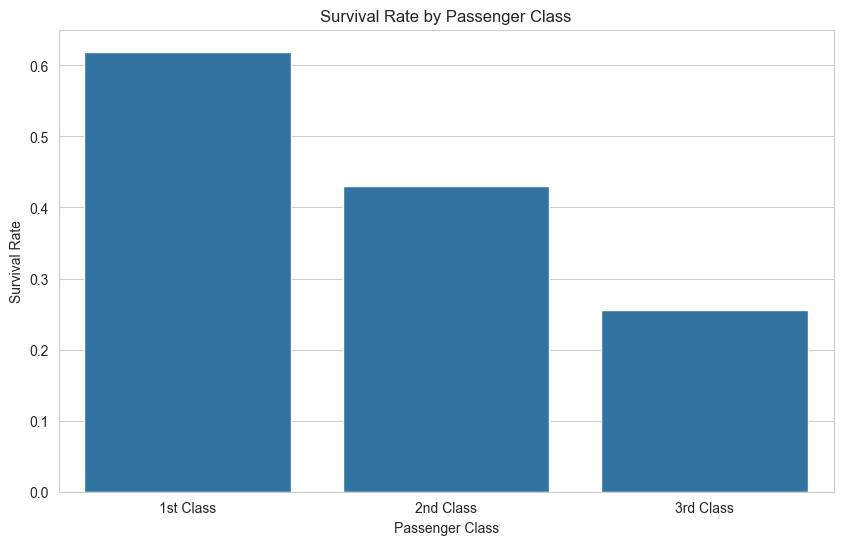

In [60]:
# Set style for the plots
sns.set_style("whitegrid")

# Plot survival rate by passenger class
plt.figure(figsize=(10,6))
sns.barplot(x="pclass", y="survived", data=titanic_df, errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(ticks=[0,1,2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

**Plot Interpretation:**

The resulting bar plot visually illustrates the relationship between passenger class and survival rate. It reveals a clear trend: the survival rate decreases as we move from 1st class to 3rd class passengers. This suggests that passengers in the higher classes, particularly 1st class, had a better chance of survival compared to those in the lower classes. This kind of visualization helps in identifying patterns and trends in the data.

## 2 - Survival Rate by Gender

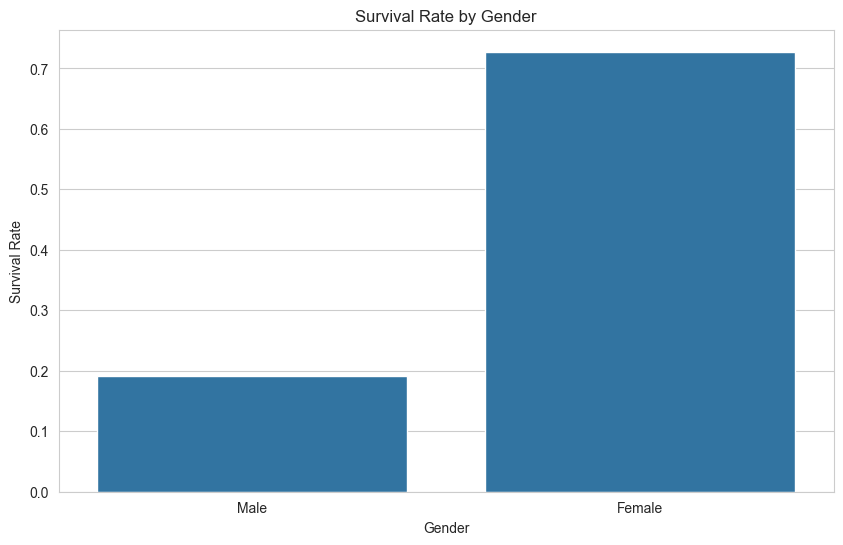

In [61]:
# Plot survival rate by gender
plt.figure(figsize=(10,6))
sns.barplot(x="sex_female", y="survived", data=titanic_df, errorbar=None)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.show()

**Plot Interpretation:**

The resulting bar plot visually demonstrates the difference in survival rates between males and females. It is evident that females had a substantially higher survival rate compared to males. This visualization helps in understanding the impact of gender on passenger survival and highlights the importance of gender as a factor in the Titanic dataset.

## 3 - Age Distribution of Survivors vs. Non-Survivors

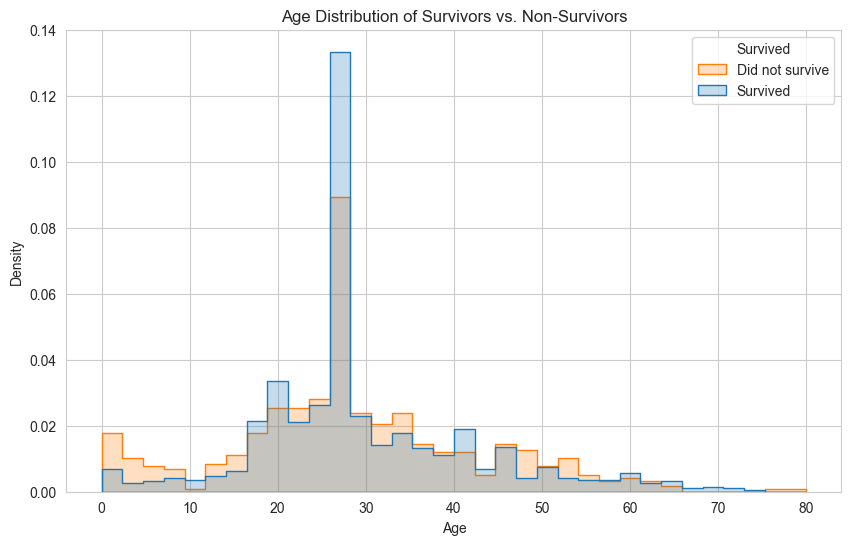

In [62]:
# Plot age distribution of survivors vs non-survivors
plt.figure(figsize=(10,6))
sns.histplot(titanic_df, x="age", hue="survived", element="step", stat="density", common_norm=False)
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Survived", labels=['Did not survive', 'Survived'])
plt.show()

**Plot Interpretation:**

The histogram visually compares the age distribution of passengers who survived (labeled as "Survived") and those who did not survive (labeled as "Did not survive"). The plot indicates that more people in their early 20s to early 30s appear to have survived, as the density of survivors is higher in this age range. This suggests a potential age-related pattern in survival, where a significant number of young adults survived the Titanic disaster.

**To add more structure to the age distrobution we will split them into categories, kids to seniors**

In [63]:
# Redefine the function to categorize ages based on the new definitions
def updated_age_category(age):
    if age <= 17:
        return 'Kid'
    elif 18 <= age <= 30:
        return 'Young Adult'
    elif 30 <= age <= 50:
        return 'Adult'
    else:
        return 'Senior'

# Apply the updated function to the 'age' column to update the 'age_category' column
titanic_df['age_category'] = titanic_df['age'].apply(updated_age_category)
titanic_df['age_category']

0       Young Adult
1               Kid
2               Kid
3       Young Adult
4       Young Adult
           ...     
1304            Kid
1305    Young Adult
1306    Young Adult
1307    Young Adult
1308    Young Adult
Name: age_category, Length: 1309, dtype: object

The 'age_category' column has been added to the dataset, providing a structured way to analyze and categorize passengers into Kids, Young Adults, Adults, and Seniors based on their age. This categorization allows for more in-depth age-related insights and analysis.

**One hot encoding for the age categories**

In [64]:
# Perform one-hot encoding on the 'age_category' column
encoded_age_category_df = pd.get_dummies(titanic_df['age_category'], prefix='age_category')
encoded_age_category_df = encoded_age_category_df.astype(int)
# Concatenate the original dataframe with the encoded age category columns
titanic_df = pd.concat([titanic_df, encoded_age_category_df], axis=1)

# Drop the original 'age_category' column
titanic_df.drop('age_category', axis=1, inplace=True)

The dataset now includes one-hot encoded columns representing age categories (Kids, Young Adults, Adults, and Seniors). These binary columns provide a structured way to analyze age-related factors in the dataset, and the original 'age_category' column has been removed for data consistency.

## 4 - Survival Rate by Number of Siblings/Spouses Aboard

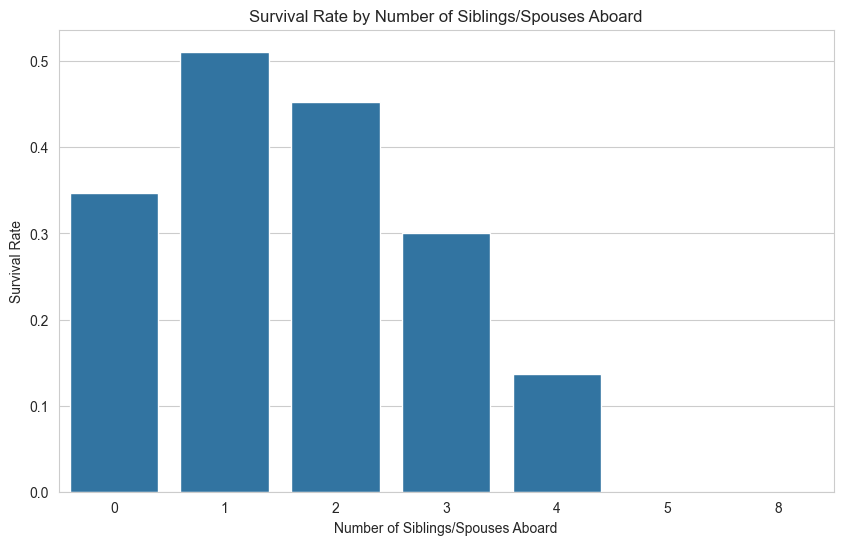

In [65]:
# Plot survival rate by number of siblings/spouses aboard
plt.figure(figsize=(10,6))
sns.barplot(x="sibsp", y="survived", data=titanic_df, errorbar=None)
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Survival Rate")
plt.show()

The resulting bar plot does not show a clear correlation between the number of siblings/spouses aboard (sibsp) and the survival rate. The survival rate appears to vary without a consistent pattern based on the number of siblings/spouses. This suggests that sibsp alone may not be a strong indicator of survival, and other factors may influence passengers' chances of surviving the Titanic.

## 5 - KDE plots for both survivors and non-survivors to showcase the distribution of fares.

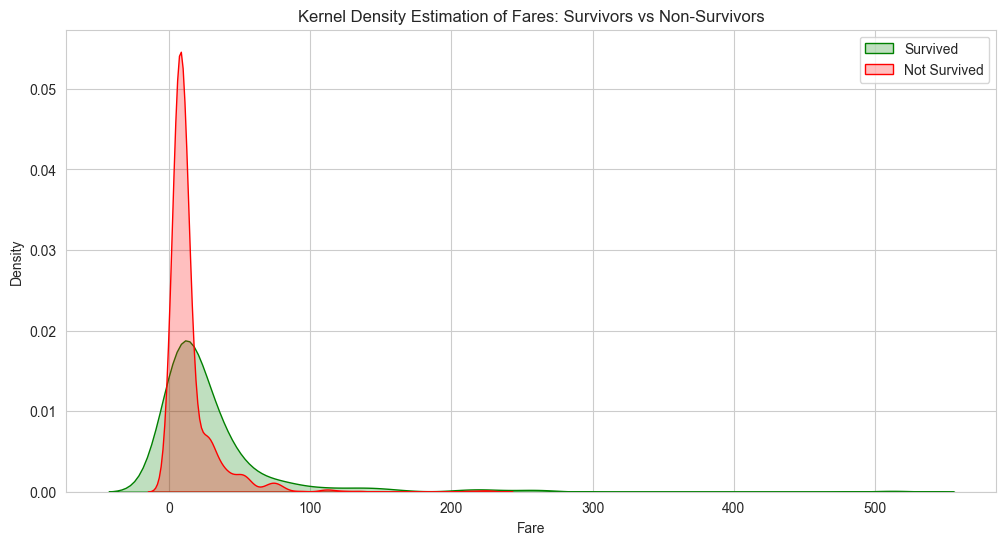

In [66]:
# Separate the data based on survival
survived = titanic_df[titanic_df['survived']==1]['fare']
not_survived = titanic_df[titanic_df['survived']==0]['fare']

plt.figure(figsize=(12, 6))
sns.kdeplot(survived, fill=True, label='Survived', color='g')
sns.kdeplot(not_survived, fill=True, label='Not Survived', color='r')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Fares: Survivors vs Non-Survivors')
plt.legend()
plt.show()

**Plot Interpretation:**

The KDE plot reveals a notable spike in the red (non-survivors) distribution within the fare range from 0 to 25. This indicates that a significant number of passengers who did not survive had lower fare values. It suggests that passengers with lower fares were less likely to survive the Titanic.

This observation could be related to various factors, such as the location of their cabins, proximity to lifeboats, or other circumstances that may have affected passengers with lower fares differently.

# Step 4: Droping Unnecessary Columns

We drop specific columns from the DataFrame to streamline the Dataset for machine learning purposes:

**Column Deletion:**

   - The first column (index 0) is removed from the DataFrame. This column is a redundant index column and is being dropped to clean the data.

   - Multiple other columns are dropped from the DataFrame. These columns include 'name' (passenger names), 'sibsp' (number of siblings/spouses), 'parch' (number of parents/children), 'ticket' (ticket numbers), 'embarked' (port of embarkation), and 'home_dest' (home/destination). These columns are considered irrelevant for the machine learning analysis and are therefore removed.

   - The specified columns are removed from the DataFrame, resulting in a more concise and focused dataset tailored for machine learning tasks.

By dropping these unnecessary columns, the dataset is made more efficient for machine learning models, as it removes features that are unlikely to provide meaningful insights or predictive power for the ML algorithms.

In [67]:
# Drop specified columns from the dataframe

titanic_df.drop(titanic_df.columns[0], axis=1, inplace=True)

titanic_df.drop(columns=[ 'name', 'sibsp', 'parch', 'ticket', 'embarked', 'home_dest'],inplace=True)

# Step 5: Exporting the Cleaned and Processed Dataset


In [68]:
titanic_df.to_csv('titanicEncoded.csv')

Throughout the process, data quality is improved, and the dataset is tailored for subsequent analytical tasks or machine learning model development. This comprehensive data preprocessing ensures that the data is ready for meaningful insights and predictive modeling.